In [1]:
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn import tree

from IPython.display import Image

import pandas as pd
import numpy as np

import pydotplus

import os

In [2]:
tennis_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/workspace/playtennis.csv')
tennis_data.head(5)

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [5]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast',1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain',2)

In [7]:
tennis_data.head(5)

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes


In [8]:
tennis_data.Temperature = tennis_data.Temperature.replace('Hot',1)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild',2)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool',3)

In [9]:
tennis_data.Humidity = tennis_data.Humidity.replace('High',1)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal',2)

In [10]:
tennis_data.Wind = tennis_data.Wind.replace('Weak',1)
tennis_data.Wind = tennis_data.Wind.replace('Strong',2)

In [11]:
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No',1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes',2)

In [12]:
tennis_data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2


In [13]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))

In [20]:
X

array([[0, 1, 1, 1],
       [0, 1, 1, 2],
       [1, 1, 1, 1],
       [2, 2, 1, 1],
       [2, 3, 2, 1],
       [2, 3, 2, 2],
       [1, 3, 2, 2],
       [0, 2, 1, 1],
       [0, 3, 2, 1],
       [2, 2, 2, 1],
       [0, 2, 2, 2],
       [1, 2, 1, 2],
       [1, 1, 2, 1],
       [2, 2, 1, 2]])

In [16]:
y.T

array([[1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [22]:
dt_clf = DecisionTreeClassifier()

In [25]:
dt_clf = dt_clf.fit(X_train, y_train)

In [26]:
dt_prediction = dt_clf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, dt_prediction)
print("정확도", accuracy)

정확도 0.75


In [28]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [29]:
feature_names

['Outlook', 'Temperature', 'Humidity', 'Wind']

In [30]:
target_name = np.array(['Play No', 'Play Yes'])

In [31]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [33]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

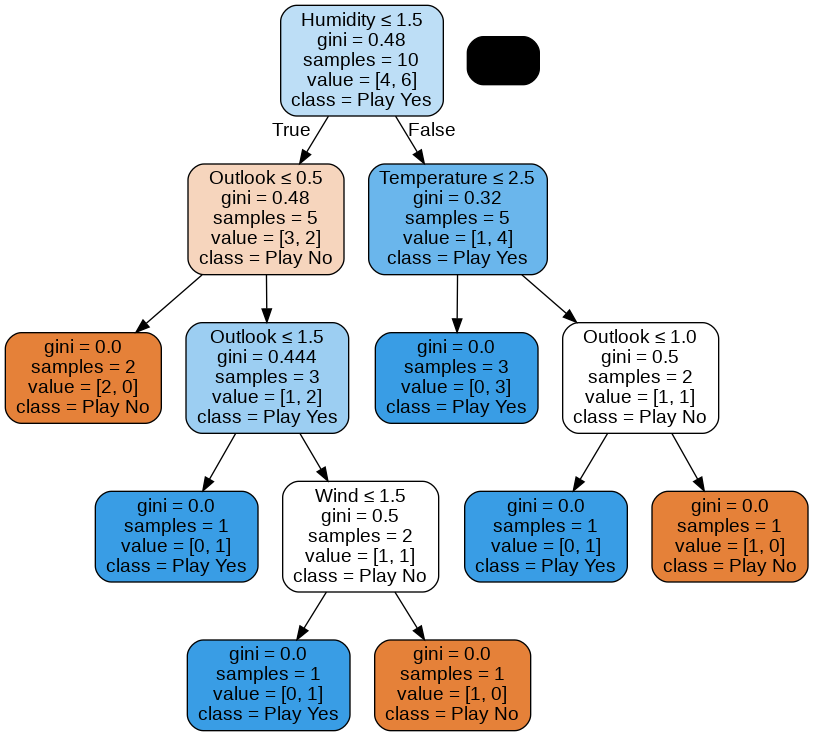

In [34]:
Image(dt_graph.create_png())